# Tema del Proyecto:
### Predicción de trastornos del sueño a partir de características personales y de salud

## Título:
### **Dormir Mejor con Datos: Machine Learning para Detectar Trastornos del Sueño**

- Este proyecto tiene como finalidad analizar cómo los hábitos de vida y factores de salud influyen en la calidad del sueño. Para ello, se han utilizado un conjunto de datos obtenidos de Kaggle, el cual recopila información sobre comportamientos diarios, condiciones médicas, niveles de estrés y patrones de sueño. A través de técnicas de análisis exploratorio de datos (EDA) y algoritmos de aprendizaje automático, se busca identificar patrones significativos y construir un modelo predictivo capaz de detectar posibles trastornos del sueño. El objetivo final es obtener conocimientos que permitan recomendar cambios personalizados en el estilo de vida para mejorar la salud del descanso.

## Objetivo del Proyecto:
- **Identificar los factores más influyentes y ayudar a mejorar hábitos para dormir mejor**
- **Analizar los hábitos de sueño:** Identificar patrones comunes de duración y calidad del sueño entre diferentes grupos demográficos (edad, ocupación, género).
- **Explorar la relación entre estilo de vida y salud del sueño:** Evaluar cómo factores como el estrés, la actividad física, el consumo de alcohol o cafeína influyen en la calidad y duración del sueño.
- **Predecir problemas de sueño:** Desarrollar modelos de aprendizaje automático que permitan predecir condiciones como la apnea del sueño o los ronquidos, a partir de variables de estilo de vida y salud.
- **Clasificar la calidad del sueño:** Utilizar técnicas de clasificación para categorizar a los individuos según su nivel de calidad de sueño (bueno, regular, malo).
- **Generar recomendaciones personalizadas:** Proponer sugerencias de mejora en los hábitos diarios basadas en los datos individuales y predicciones del modelo.

### Variable Objetivo (Target)
**El objetivo principal de este proyecto es predecir si una persona presenta algún tipo de trastorno del sueño, representado en la variable Sleep_Disorder.**


### ¿Qué se puede predecir?:
- **Tipo de predicción** Se trata de un problema de clasificación, en el que el modelo determinará si una persona tiene o no tiene un trastorno del sueño, y en caso afirmativo, de qué tipo (como insomnio, apnea del sueño, narcolepsia, etc.). (Random Forest, XGBoost, o redes neuronales )
- **Relevancia médica y social** Anticipar este tipo de condiciones tiene un gran valor, ya que permite intervenir de forma temprana, reducir riesgos asociados y mejorar la calidad de vida.
- **Aplicabilidad práctica** El modelo puede entregar recomendaciones concretas del tipo “esta persona probablemente tiene insomnio o apnea del sueño”, lo cual puede ser útil para clínicas, médicos o herramientas de autocuidado.

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA   
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Importar para guardar y cargar el modelo
import pickle

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

----
- Dataset sobre Sleep_disorder:
- https://www.kaggle.com/datasets/ziya07/sleep-disorder-diagnostic-dataset

In [2]:
df = pd.read_csv('../data/sleep_disorder.csv')
df

,Patient_ID,Age,Gender,Sleep_Disorder_Type,AHI_Score,SaO2_Level,OCR_Extracted_Text,Diagnosis_Confirmed
0,P0001,54,Female,Restless Leg Syndrome,44.11,77.59,Patient P0001 diagnosed with Restless Leg Synd...,1
1,P0002,17,Female,Restless Leg Syndrome,33.55,76.22,Patient P0002 diagnosed with Restless Leg Synd...,1
2,P0003,74,Male,Insomnia,12.91,89.53,Patient P0003 diagnosed with Insomnia.,1
3,P0004,63,Male,Restless Leg Syndrome,33.73,85.65,Patient P0004 diagnosed with Restless Leg Synd...,1
4,P0005,23,Female,Insomnia,14.84,88.70,Patient P0005 diagnosed with Insomnia.,1
...,...,...,...,...,...,...,...,...
995,P0996,23,Female,Insomnia,41.57,83.14,Patient P0996 diagnosed with Insomnia.,1
996,P0997,49,Female,No Disorder,42.12,84.85,Patient P0997 diagnosed with No Disorder.,1
997,P0998,75,Male,Obstructive Sleep Apnea,18.66,90.08,Patient P0998 diagnosed with Obstructive Sleep...,1
998,P0999,55,Female,Insomnia,31.60,95.04,Patient P0999 diagnosed with Insomnia.,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           1000 non-null   object 
 1   Age                  1000 non-null   int64  
 2   Gender               1000 non-null   object 
 3   Sleep_Disorder_Type  1000 non-null   object 
 4   AHI_Score            1000 non-null   float64
 5   SaO2_Level           1000 non-null   float64
 6   OCR_Extracted_Text   1000 non-null   object 
 7   Diagnosis_Confirmed  1000 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [4]:
df.describe()

,Age,AHI_Score,SaO2_Level,Diagnosis_Confirmed
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.490000,25.715150,87.482860,0.884000
std,22.659642,14.324888,7.179349,0.320385
min,3.000000,0.020000,75.000000,0.000000
25%,21.000000,13.450000,81.335000,1.000000
50%,40.000000,26.395000,87.610000,1.000000
75%,60.000000,38.105000,93.790000,1.000000
max,80.000000,49.990000,99.940000,1.000000


In [5]:
df.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Sleep_Disorder_Type    0
AHI_Score              0
SaO2_Level             0
OCR_Extracted_Text     0
Diagnosis_Confirmed    0
dtype: int64

In [6]:
# Convertir columnas de tipo object a category
object_columns = df.select_dtypes(include='object').columns
df[object_columns] = df[object_columns].astype('category')

In [7]:
df.dtypes

Patient_ID             category
Age                       int64
Gender                 category
Sleep_Disorder_Type    category
AHI_Score               float64
SaO2_Level              float64
OCR_Extracted_Text     category
Diagnosis_Confirmed       int64
dtype: object

In [8]:
# Ver los tipos únicos de trastornos del sueño en la columna Sleep_Disorder_Type
unique_disorders = df['Sleep_Disorder_Type'].unique()
print("Tipos de trastornos del sueño:", unique_disorders)

Tipos de trastornos del sueño: ['Restless Leg Syndrome', 'Insomnia', 'Narcolepsy', 'Obstructive Sleep Apnea', 'No Disorder']
Categories (5, object): ['Insomnia', 'Narcolepsy', 'No Disorder', 'Obstructive Sleep Apnea', 'Restless Leg Syndrome']


#### Explicación de Tipos de trastornos
- Restless Leg Syndrome → Síndrome de Piernas Inquietas. Trastorno neurológico caracterizado por una necesidad incontrolable de mover las piernas, especialmente por la noche.
- Insomnia → Insomnio. Dificultad para conciliar el sueño, permanecer dormido o despertarse demasiado temprano y no poder volver a dormir.
- Narcolepsy → Narcolepsia. Trastorno del sueño que provoca somnolencia extrema durante el día y episodios súbitos de sueño.
- Obstructive Sleep Apnea → Apnea Obstructiva del Sueño. Trastorno en el que la respiración se interrumpe repetidamente durante el sueño debido a una obstrucción de las vías respiratorias.
- No Disorder → Sin Trastorno. Pacientes que no presentan ningún trastorno del sueño diagnosticado.
---

#### DataSet sobre sleep_disorder
- **Patient_ID**	Identificador único de cada persona.
- **Age**	Edad del paciente (en años).
- **Gender**	Género de la persona (Male o Female).
- **Sleep_Disorder_Type** Diagnóstico del trastorno del sueño del paciente (categórico, con varias categorías como Apnea del Sueño, Insomnio, Narcolepsia, etc.).
- **AHI_Score** Puntaje del índice Apnea-Hipopnea del paciente (numérico).
- **SaO2_Level** Nivel de saturación de oxígeno en sangre del paciente (numérico).
- **OCR_Extracted_Text** Texto extraído mediante OCR de los documentos médicos escaneados (texto). **Necesita NPL para su análisis (Procesamiento de lenguaje natural)**
- **Diagnosis_Confirmed** Columna binaria que indica si el diagnóstico de trastorno del sueño está confirmado (1 para confirmado, 0 para no confirmado).

In [9]:
df['Sleep_Disorder_Type'].value_counts()

Sleep_Disorder_Type
Obstructive Sleep Apnea    309
Insomnia                   255
Restless Leg Syndrome      203
Narcolepsy                 150
No Disorder                 83
Name: count, dtype: int64

# predecir la clase de tipo de disorder

---


 ### Análisis 

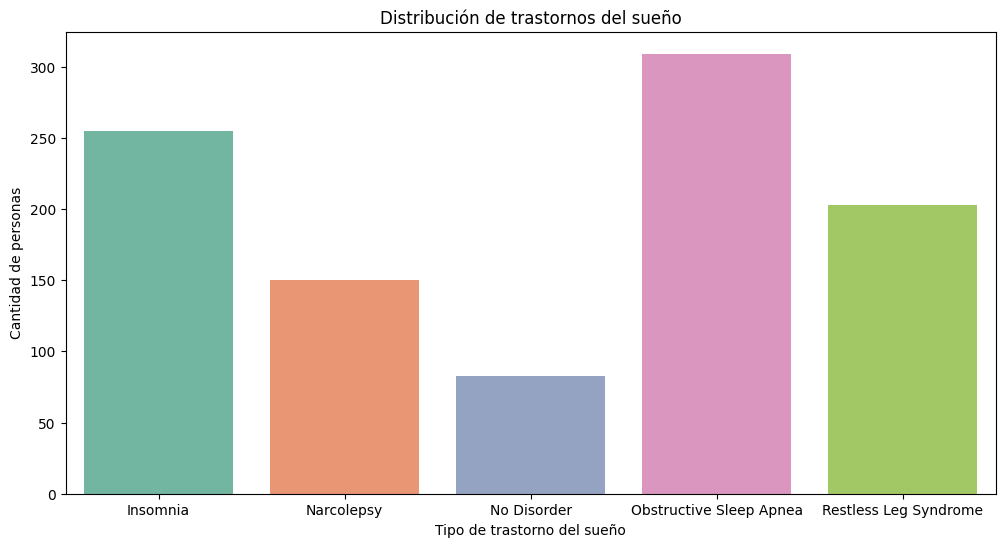

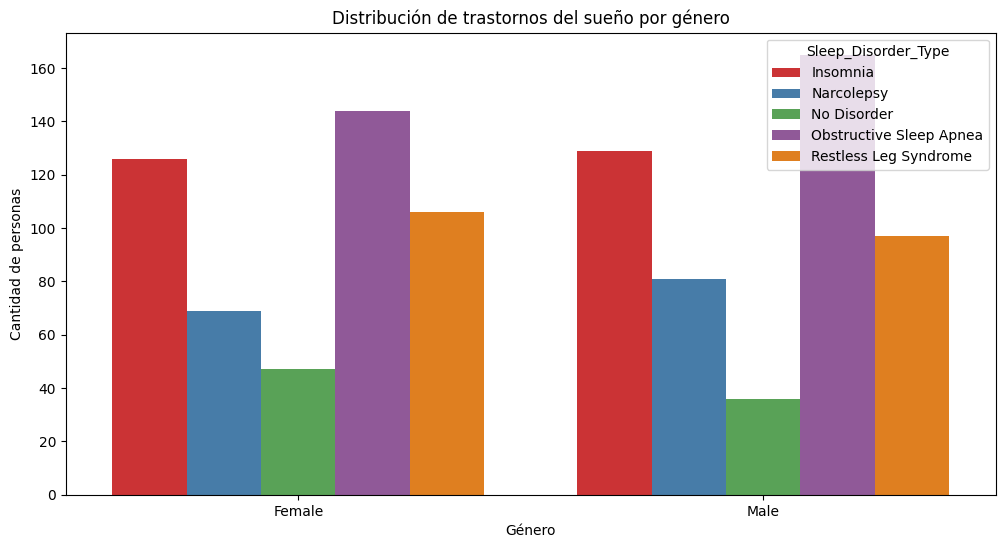

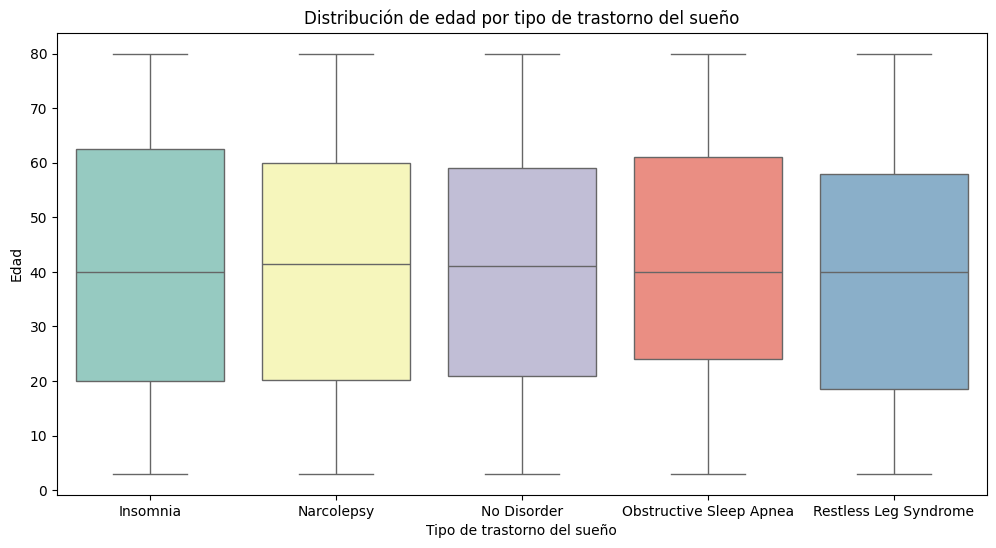

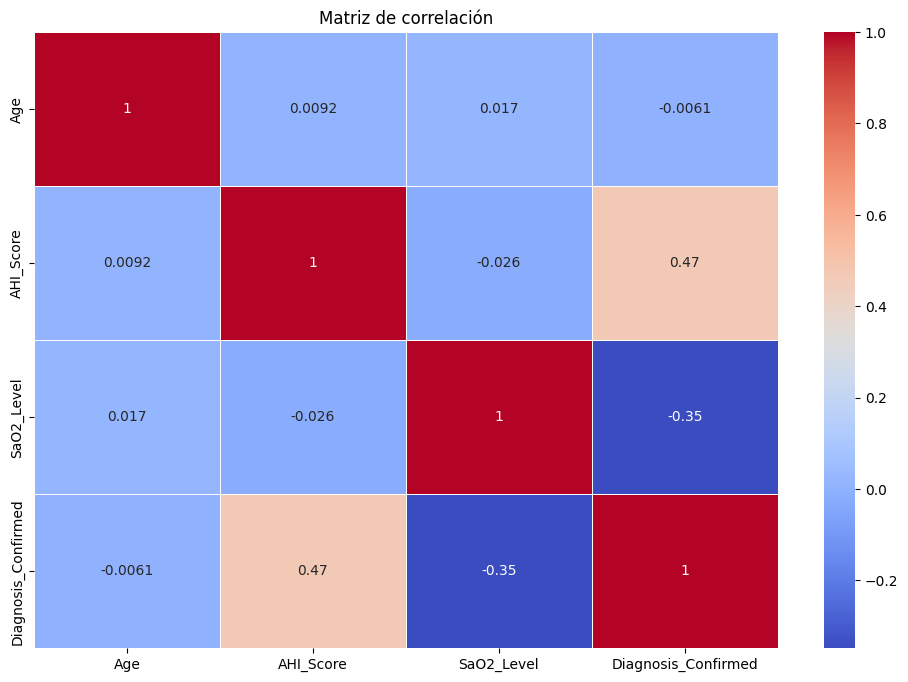

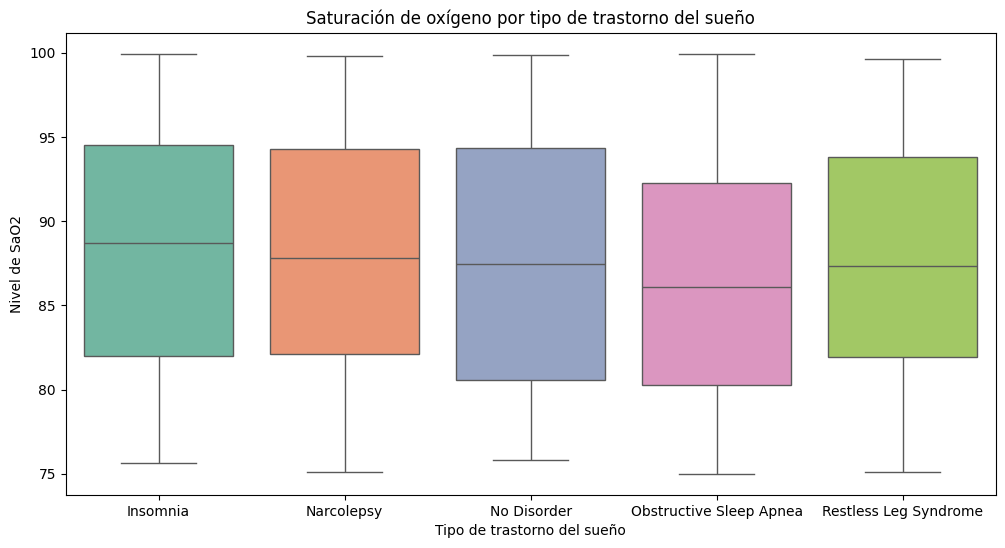

In [10]:
# Visualización de la distribución de la variable objetivo
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Sleep_Disorder_Type', palette='Set2')
plt.title('Distribución de trastornos del sueño')
plt.xlabel('Tipo de trastorno del sueño')
plt.ylabel('Cantidad de personas')
plt.show()

# Visualización de género vs trastorno del sueño
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Gender', hue='Sleep_Disorder_Type', palette='Set1')
plt.title('Distribución de trastornos del sueño por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de personas')
plt.show()

# Relación entre Age y trastorno del sueño
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Sleep_Disorder_Type', y='Age', palette='Set3')
plt.title('Distribución de edad por tipo de trastorno del sueño')
plt.xlabel('Tipo de trastorno del sueño')
plt.ylabel('Edad')
plt.show()

# Matriz de correlación para variables numéricas
plt.figure(figsize=(12, 8))
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation = df[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

# Distribución de saturación de oxígeno por trastorno del sueño
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Sleep_Disorder_Type', y='SaO2_Level', palette='Set2')
plt.title('Saturación de oxígeno por tipo de trastorno del sueño')
plt.xlabel('Tipo de trastorno del sueño')
plt.ylabel('Nivel de SaO2')
plt.show()


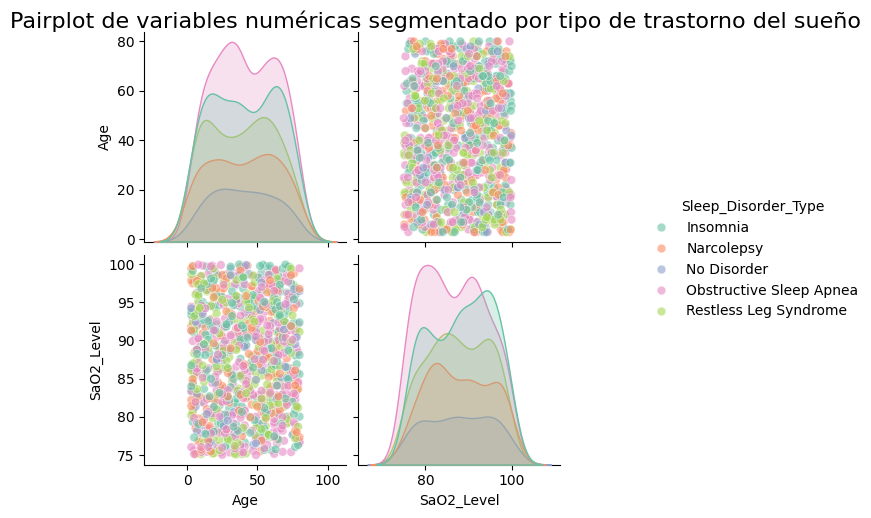

In [11]:
# Pairplot

# Seleccionamos solo las columnas numéricas que existen en el dataframe
numeric_features = [col for col in ['Age', 'BMI', 'Heart Rate', 'Blood Pressure', 'SaO2_Level'] if col in df.columns]

# Creamos el pairplot con diferenciación por tipo de trastorno del sueño
sns.pairplot(df[numeric_features + ['Sleep_Disorder_Type']], 
             hue='Sleep_Disorder_Type', 
             palette='Set2',
             diag_kind='kde',  # tipo de gráfica para la diagonal
             plot_kws={'alpha': 0.6, 's': 40})  # ajustes de transparencia y tamaño

plt.suptitle('Pairplot de variables numéricas segmentado por tipo de trastorno del sueño', 
             y=1.02, fontsize=16)
plt.show()


---

 #### OCR Texto extraído mediante OCR de los documentos médicos escaneados (texto). **Necesita NLP para su análisis (Procesamiento de lenguaje natural)**

***Resumen del pipeline para trabajarlo:***
- Limpieza → clean_ocr_text
- Corrección (opcional)
- Tokenización + stopwords
- Vectorización (TF-IDF, Word2Vec, BERT…)
- Modelado

¿Cuándo sería útil incluir texto OCR?
El texto extraído por OCR puede ser valioso si contiene información clínica, médica o personal que no está presente en las columnas estructuradas. Ejemplos:
Notas de diagnóstico ("paciente refiere dificultad para dormir desde hace 3 meses")
Resultados de estudios del sueño (como polisomnografía en formato texto)
Informes médicos o antecedentes escritos
Sintomatología descrita por el paciente

---

#### Paso 1: Ver primeras filas Dataset

In [12]:
# Limpieza OCR

print(df[['OCR_Extracted_Text']].head())

                                  OCR_Extracted_Text
0  Patient P0001 diagnosed with Restless Leg Synd...
1  Patient P0002 diagnosed with Restless Leg Synd...
2             Patient P0003 diagnosed with Insomnia.
3  Patient P0004 diagnosed with Restless Leg Synd...
4             Patient P0005 diagnosed with Insomnia.


#### Paso 2: Limpieza básica del texto OCR

In [13]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('spanish'))

def limpiar_texto(texto):
    if pd.isna(texto):
        return ""
    texto = texto.lower()                          # Minusculas
    texto = re.sub(r'\d+', '', texto)              # Eliminar números
    texto = re.sub(r'[^\w\s]', '', texto)          # Eliminar signos de puntuación
    texto = re.sub(r'\s+', ' ', texto).strip()     # Eliminar espacios extra
    texto = ' '.join([w for w in texto.split() if w not in stop_words])  # Eliminar stopwords
    return texto

# Aplicamos la limpieza
df['OCR_Text_Limpio'] = df['OCR_Extracted_Text'].apply(limpiar_texto)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nsara\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Paso 3: Tokenización

In [14]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')  # Ensure the punkt tokenizer is downloaded
nltk.download('punkt_tab')  # Download punkt_tab if required

df['OCR_Text_Tokens'] = df['OCR_Text_Limpio'].apply(word_tokenize)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nsara\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\nsara\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### Paso 4: Stemming (opcional)

In [15]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')

df['OCR_Text_Stems'] = df['OCR_Text_Tokens'].apply(lambda tokens: [stemmer.stem(w) for w in tokens])


In [16]:
df

,Patient_ID,Age,Gender,Sleep_Disorder_Type,AHI_Score,SaO2_Level,OCR_Extracted_Text,Diagnosis_Confirmed,OCR_Text_Limpio,OCR_Text_Tokens,OCR_Text_Stems
0,P0001,54,Female,Restless Leg Syndrome,44.11,77.59,Patient P0001 diagnosed with Restless Leg Synd...,1,patient p diagnosed with restless leg syndrome,"[patient, p, diagnosed, with, restless, leg, s...","[patient, p, diagn, with, restless, leg, syndrom]"
1,P0002,17,Female,Restless Leg Syndrome,33.55,76.22,Patient P0002 diagnosed with Restless Leg Synd...,1,patient p diagnosed with restless leg syndrome,"[patient, p, diagnosed, with, restless, leg, s...","[patient, p, diagn, with, restless, leg, syndrom]"
2,P0003,74,Male,Insomnia,12.91,89.53,Patient P0003 diagnosed with Insomnia.,1,patient p diagnosed with insomnia,"[patient, p, diagnosed, with, insomnia]","[patient, p, diagn, with, insomni]"
3,P0004,63,Male,Restless Leg Syndrome,33.73,85.65,Patient P0004 diagnosed with Restless Leg Synd...,1,patient p diagnosed with restless leg syndrome,"[patient, p, diagnosed, with, restless, leg, s...","[patient, p, diagn, with, restless, leg, syndrom]"
4,P0005,23,Female,Insomnia,14.84,88.70,Patient P0005 diagnosed with Insomnia.,1,patient p diagnosed with insomnia,"[patient, p, diagnosed, with, insomnia]","[patient, p, diagn, with, insomni]"
...,...,...,...,...,...,...,...,...,...,...,...
995,P0996,23,Female,Insomnia,41.57,83.14,Patient P0996 diagnosed with Insomnia.,1,patient p diagnosed with insomnia,"[patient, p, diagnosed, with, insomnia]","[patient, p, diagn, with, insomni]"
996,P0997,49,Female,No Disorder,42.12,84.85,Patient P0997 diagnosed with No Disorder.,1,patient p diagnosed with disorder,"[patient, p, diagnosed, with, disorder]","[patient, p, diagn, with, disord]"
997,P0998,75,Male,Obstructive Sleep Apnea,18.66,90.08,Patient P0998 diagnosed with Obstructive Sleep...,1,patient p diagnosed with obstructive sleep apnea,"[patient, p, diagnosed, with, obstructive, sle...","[patient, p, diagn, with, obstructiv, sleep, a..."
998,P0999,55,Female,Insomnia,31.60,95.04,Patient P0999 diagnosed with Insomnia.,1,patient p diagnosed with insomnia,"[patient, p, diagnosed, with, insomnia]","[patient, p, diagn, with, insomni]"


---

### Paso 1: Importar y aplicar TF-IDF

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear el vectorizador
vectorizer = TfidfVectorizer()

# Ajustar y transformar los textos limpios
tfidf_matrix = vectorizer.fit_transform(df['OCR_Text_Limpio'])

# Convertir el resultado en un DataFrame legible
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Opcional: unirlo con el dataframe original
df_final = pd.concat([df, tfidf_df], axis=1)


In [18]:
df_final

,Patient_ID,Age,Gender,Sleep_Disorder_Type,AHI_Score,SaO2_Level,OCR_Extracted_Text,Diagnosis_Confirmed,OCR_Text_Limpio,OCR_Text_Tokens,...,disorder,insomnia,leg,narcolepsy,obstructive,patient,restless,sleep,syndrome,with
0,P0001,54,Female,Restless Leg Syndrome,44.11,77.59,Patient P0001 diagnosed with Restless Leg Synd...,1,patient p diagnosed with restless leg syndrome,"[patient, p, diagnosed, with, restless, leg, s...",...,0.000000,0.000000,0.538616,0.0,0.000000,0.207909,0.538616,0.000000,0.538616,0.207909
1,P0002,17,Female,Restless Leg Syndrome,33.55,76.22,Patient P0002 diagnosed with Restless Leg Synd...,1,patient p diagnosed with restless leg syndrome,"[patient, p, diagnosed, with, restless, leg, s...",...,0.000000,0.000000,0.538616,0.0,0.000000,0.207909,0.538616,0.000000,0.538616,0.207909
2,P0003,74,Male,Insomnia,12.91,89.53,Patient P0003 diagnosed with Insomnia.,1,patient p diagnosed with insomnia,"[patient, p, diagnosed, with, insomnia]",...,0.000000,0.806607,0.000000,0.0,0.000000,0.341265,0.000000,0.000000,0.000000,0.341265
3,P0004,63,Male,Restless Leg Syndrome,33.73,85.65,Patient P0004 diagnosed with Restless Leg Synd...,1,patient p diagnosed with restless leg syndrome,"[patient, p, diagnosed, with, restless, leg, s...",...,0.000000,0.000000,0.538616,0.0,0.000000,0.207909,0.538616,0.000000,0.538616,0.207909
4,P0005,23,Female,Insomnia,14.84,88.70,Patient P0005 diagnosed with Insomnia.,1,patient p diagnosed with insomnia,"[patient, p, diagnosed, with, insomnia]",...,0.000000,0.806607,0.000000,0.0,0.000000,0.341265,0.000000,0.000000,0.000000,0.341265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P0996,23,Female,Insomnia,41.57,83.14,Patient P0996 diagnosed with Insomnia.,1,patient p diagnosed with insomnia,"[patient, p, diagnosed, with, insomnia]",...,0.000000,0.806607,0.000000,0.0,0.000000,0.341265,0.000000,0.000000,0.000000,0.341265
996,P0997,49,Female,No Disorder,42.12,84.85,Patient P0997 diagnosed with No Disorder.,1,patient p diagnosed with disorder,"[patient, p, diagnosed, with, disorder]",...,0.895138,0.000000,0.000000,0.0,0.000000,0.257376,0.000000,0.000000,0.000000,0.257376
997,P0998,75,Male,Obstructive Sleep Apnea,18.66,90.08,Patient P0998 diagnosed with Obstructive Sleep...,1,patient p diagnosed with obstructive sleep apnea,"[patient, p, diagnosed, with, obstructive, sle...",...,0.000000,0.000000,0.000000,0.0,0.524444,0.241437,0.000000,0.524444,0.000000,0.241437
998,P0999,55,Female,Insomnia,31.60,95.04,Patient P0999 diagnosed with Insomnia.,1,patient p diagnosed with insomnia,"[patient, p, diagnosed, with, insomnia]",...,0.000000,0.806607,0.000000,0.0,0.000000,0.341265,0.000000,0.000000,0.000000,0.341265


---

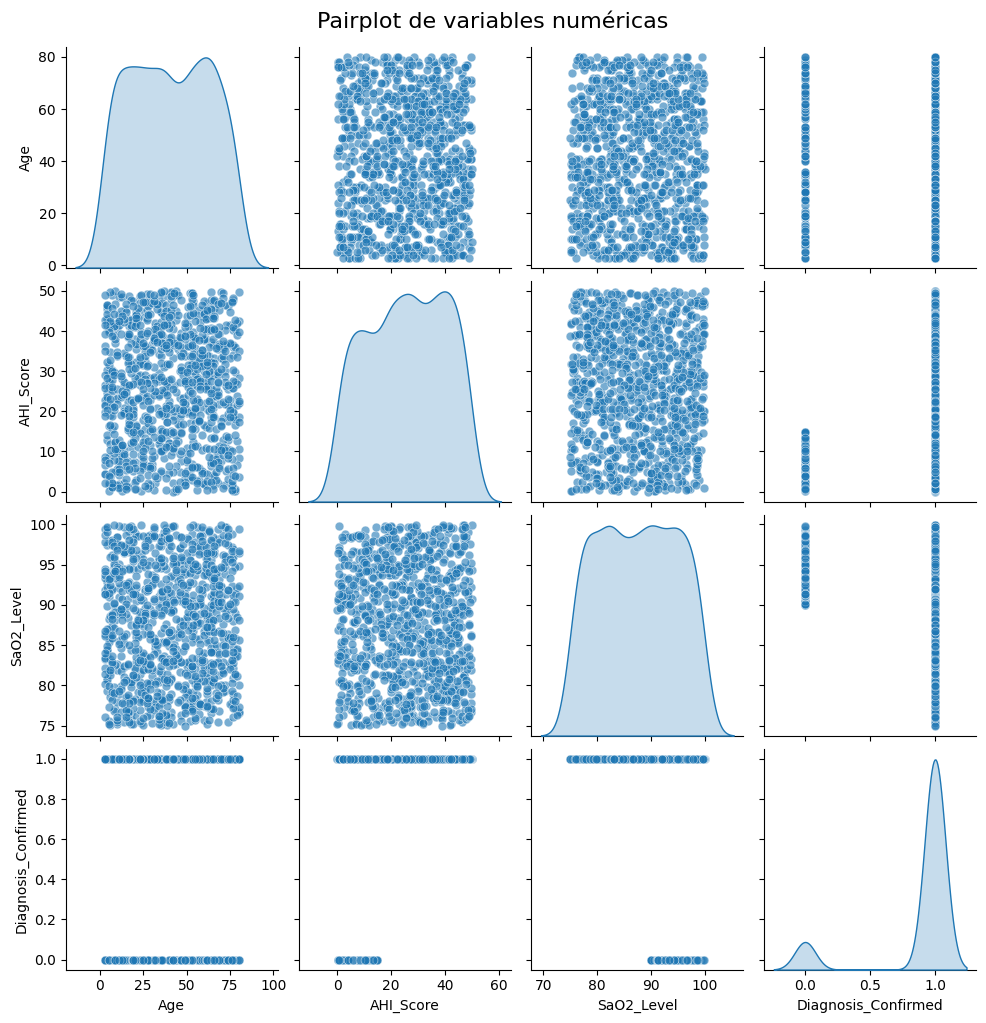

In [19]:
# Crear un nuevo pairplot con variables numéricas seleccionadas
sns.pairplot(df[numeric_cols], diag_kind='kde', plot_kws={'alpha': 0.6, 's': 40})
plt.suptitle('Pairplot de variables numéricas', y=1.02, fontsize=16)
plt.show()

---

### Prueba Modelo de predicción

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Supongamos que la columna objetivo es 'Diagnosis_Confirmed'
X = tfidf_df
y = df['Diagnosis_Confirmed']  # Usamos la columna correcta

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predecir
y_pred = clf.predict(X_test)

# Reporte
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.90      1.00      0.94       179

    accuracy                           0.90       200
   macro avg       0.45      0.50      0.47       200
weighted avg       0.80      0.90      0.85       200



### 2. Recomendaciones personalizadas

In [21]:
def recomendar(diagnostico):
    recomendaciones = {
        "Insomnio": "Evita pantallas antes de dormir y considera terapia cognitivo-conductual.",
        "Apnea del sueño": "Consulta a un especialista en sueño. Puede necesitar CPAP.",
        "Narcolepsia": "Consulta un neurólogo. Sigue horarios estrictos de sueño.",
        "Normal": "Mantén una rutina de sueño saludable."
    }
    return recomendaciones.get(diagnostico, "Consulta a un especialista.")

df['Recomendación'] = df['Sleep_Disorder_Type'].apply(recomendar)


---

1 Diseño o App sencilla para mostrar resultados
Aquí tienes tres opciones fáciles para presentar los resultados:

A. Jupyter Notebook interactivo
Con ipywidgets para seleccionar un caso y mostrar la predicción y recomendación.

B. App web con Streamlit (súper fácil de usar)

---


In [22]:
# exportar el df_final a csv para tableau o Power BI
df_final.to_csv("df_final.csv", index=False)
